In [231]:
import pandas as pd 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
import math
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, FixedTicker, Legend
from bokeh.io import output_notebook



In [196]:
nfl = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [198]:
nfl

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,9/10/09,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,9/10/09,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,9/10/09,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,9/10/09,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,9/10/09,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,12/31/17,2017123101,29,4,NaN,0:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,12/31/17,2017123101,29,4,3.0,0:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,12/31/17,2017123101,29,4,4.0,0:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,12/31/17,2017123101,30,4,1.0,0:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [199]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [200]:
nfl.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)

In [201]:
nfl.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.961115,0.325123,0.231411,0.321701,0.227694,0.276472,-0.014728,-0.011518,-0.018683,2011.000000
50%,2.013111e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531274,0.469052,0.533609,0.466670,0.504470,0.000000,0.003441,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.485508,0.769232,0.675530,0.772882,0.678833,0.725477,0.014684,0.035792,0.011431,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [202]:
all_play_types = print(nfl['PlayType'])

0             Kickoff
1                Pass
2                 Run
3                Pass
4                Punt
             ...     
407683        Timeout
407684           Pass
407685           Pass
407686       QB Kneel
407687    End of Game
Name: PlayType, Length: 407688, dtype: object


In [203]:
nfl['Touchdown'].value_counts().head()


0    395837
1     11851
Name: Touchdown, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [148]:
plt.style.use("fivethirtyeight")

In [149]:
year_x = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
touchdowns_y = [1148, 1250, 1226 , 1364, 1333, 1274, 1236 , 1282, 1317]

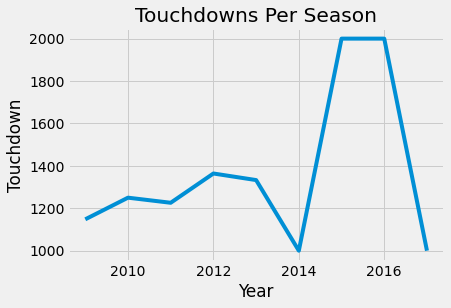

In [150]:
plt.plot(year_x, touchdown_y)
plt.xlabel("Year")
plt.ylabel("Touchdown")
plt.title("Touchdowns Per Season")
plt.show()

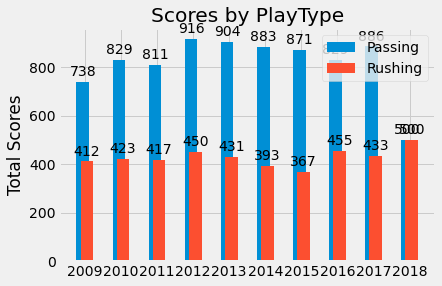

<Figure size 3600x3600 with 0 Axes>

In [151]:
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
passing_touchdowns = [738, 829,811, 916, 904,883,871, 829, 886, 500]
rushing_touchdowns = [412, 423, 417, 450, 431,393, 367, 455,433, 500]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/6, passing_touchdowns, width, label='Passing')
rects2 = ax.bar(x + width/6, rushing_touchdowns, width, label='Rushing')

ax.set_ylabel('Total Scores')
ax.set_title('Scores by PlayType')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()
plt.figure(figsize= (50,50))
plt.show()

In [74]:
#show runs called when yrdstogo is 5 or less 



In [79]:
#percentage of type of plays called
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

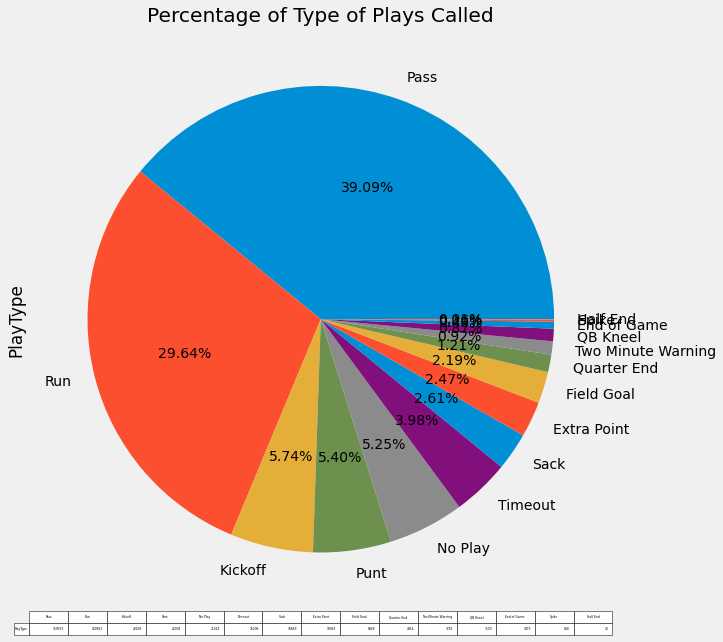

In [85]:
plt.style.use("fivethirtyeight")
nfl_data['PlayType'].value_counts().plot.pie(figsize=(16, 10), title="Percentage of Type of Plays Called", 
                                              table=True, autopct="%.2f%%")

In [87]:
all_play_types = Counter(nfl_data['PlayType'])
all_play_types

Counter({'Kickoff': 23403,
         'Pass': 159353,
         'Run': 120831,
         'Punt': 22003,
         'Sack': 10649,
         'Field Goal': 8928,
         'No Play': 21414,
         'Quarter End': 4914,
         'Two Minute Warning': 3741,
         'Timeout': 16206,
         'Extra Point': 10063,
         'QB Kneel': 3530,
         'End of Game': 1973,
         'Spike': 640,
         'Half End': 40})

In [89]:
plays_on_down = [Counter(nfl_data.loc[nfl_data['down'] == down]['PlayType']) for down in range(1,5)]


In [91]:
plays_on_down[2]

Counter({'Pass': 44229,
         'Run': 12638,
         'Sack': 4200,
         'No Play': 5555,
         'Field Goal': 222,
         'Punt': 5,
         'QB Kneel': 504,
         'Timeout': 8,
         'Spike': 35,
         'Kickoff': 1,
         'Half End': 1})

In [92]:
plays_on_down[3]

Counter({'Punt': 21997,
         'Field Goal': 8209,
         'No Play': 1621,
         'Pass': 2530,
         'Run': 1599,
         'Sack': 184,
         'QB Kneel': 27,
         'Timeout': 2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12816cc70>,
      dtype=object)

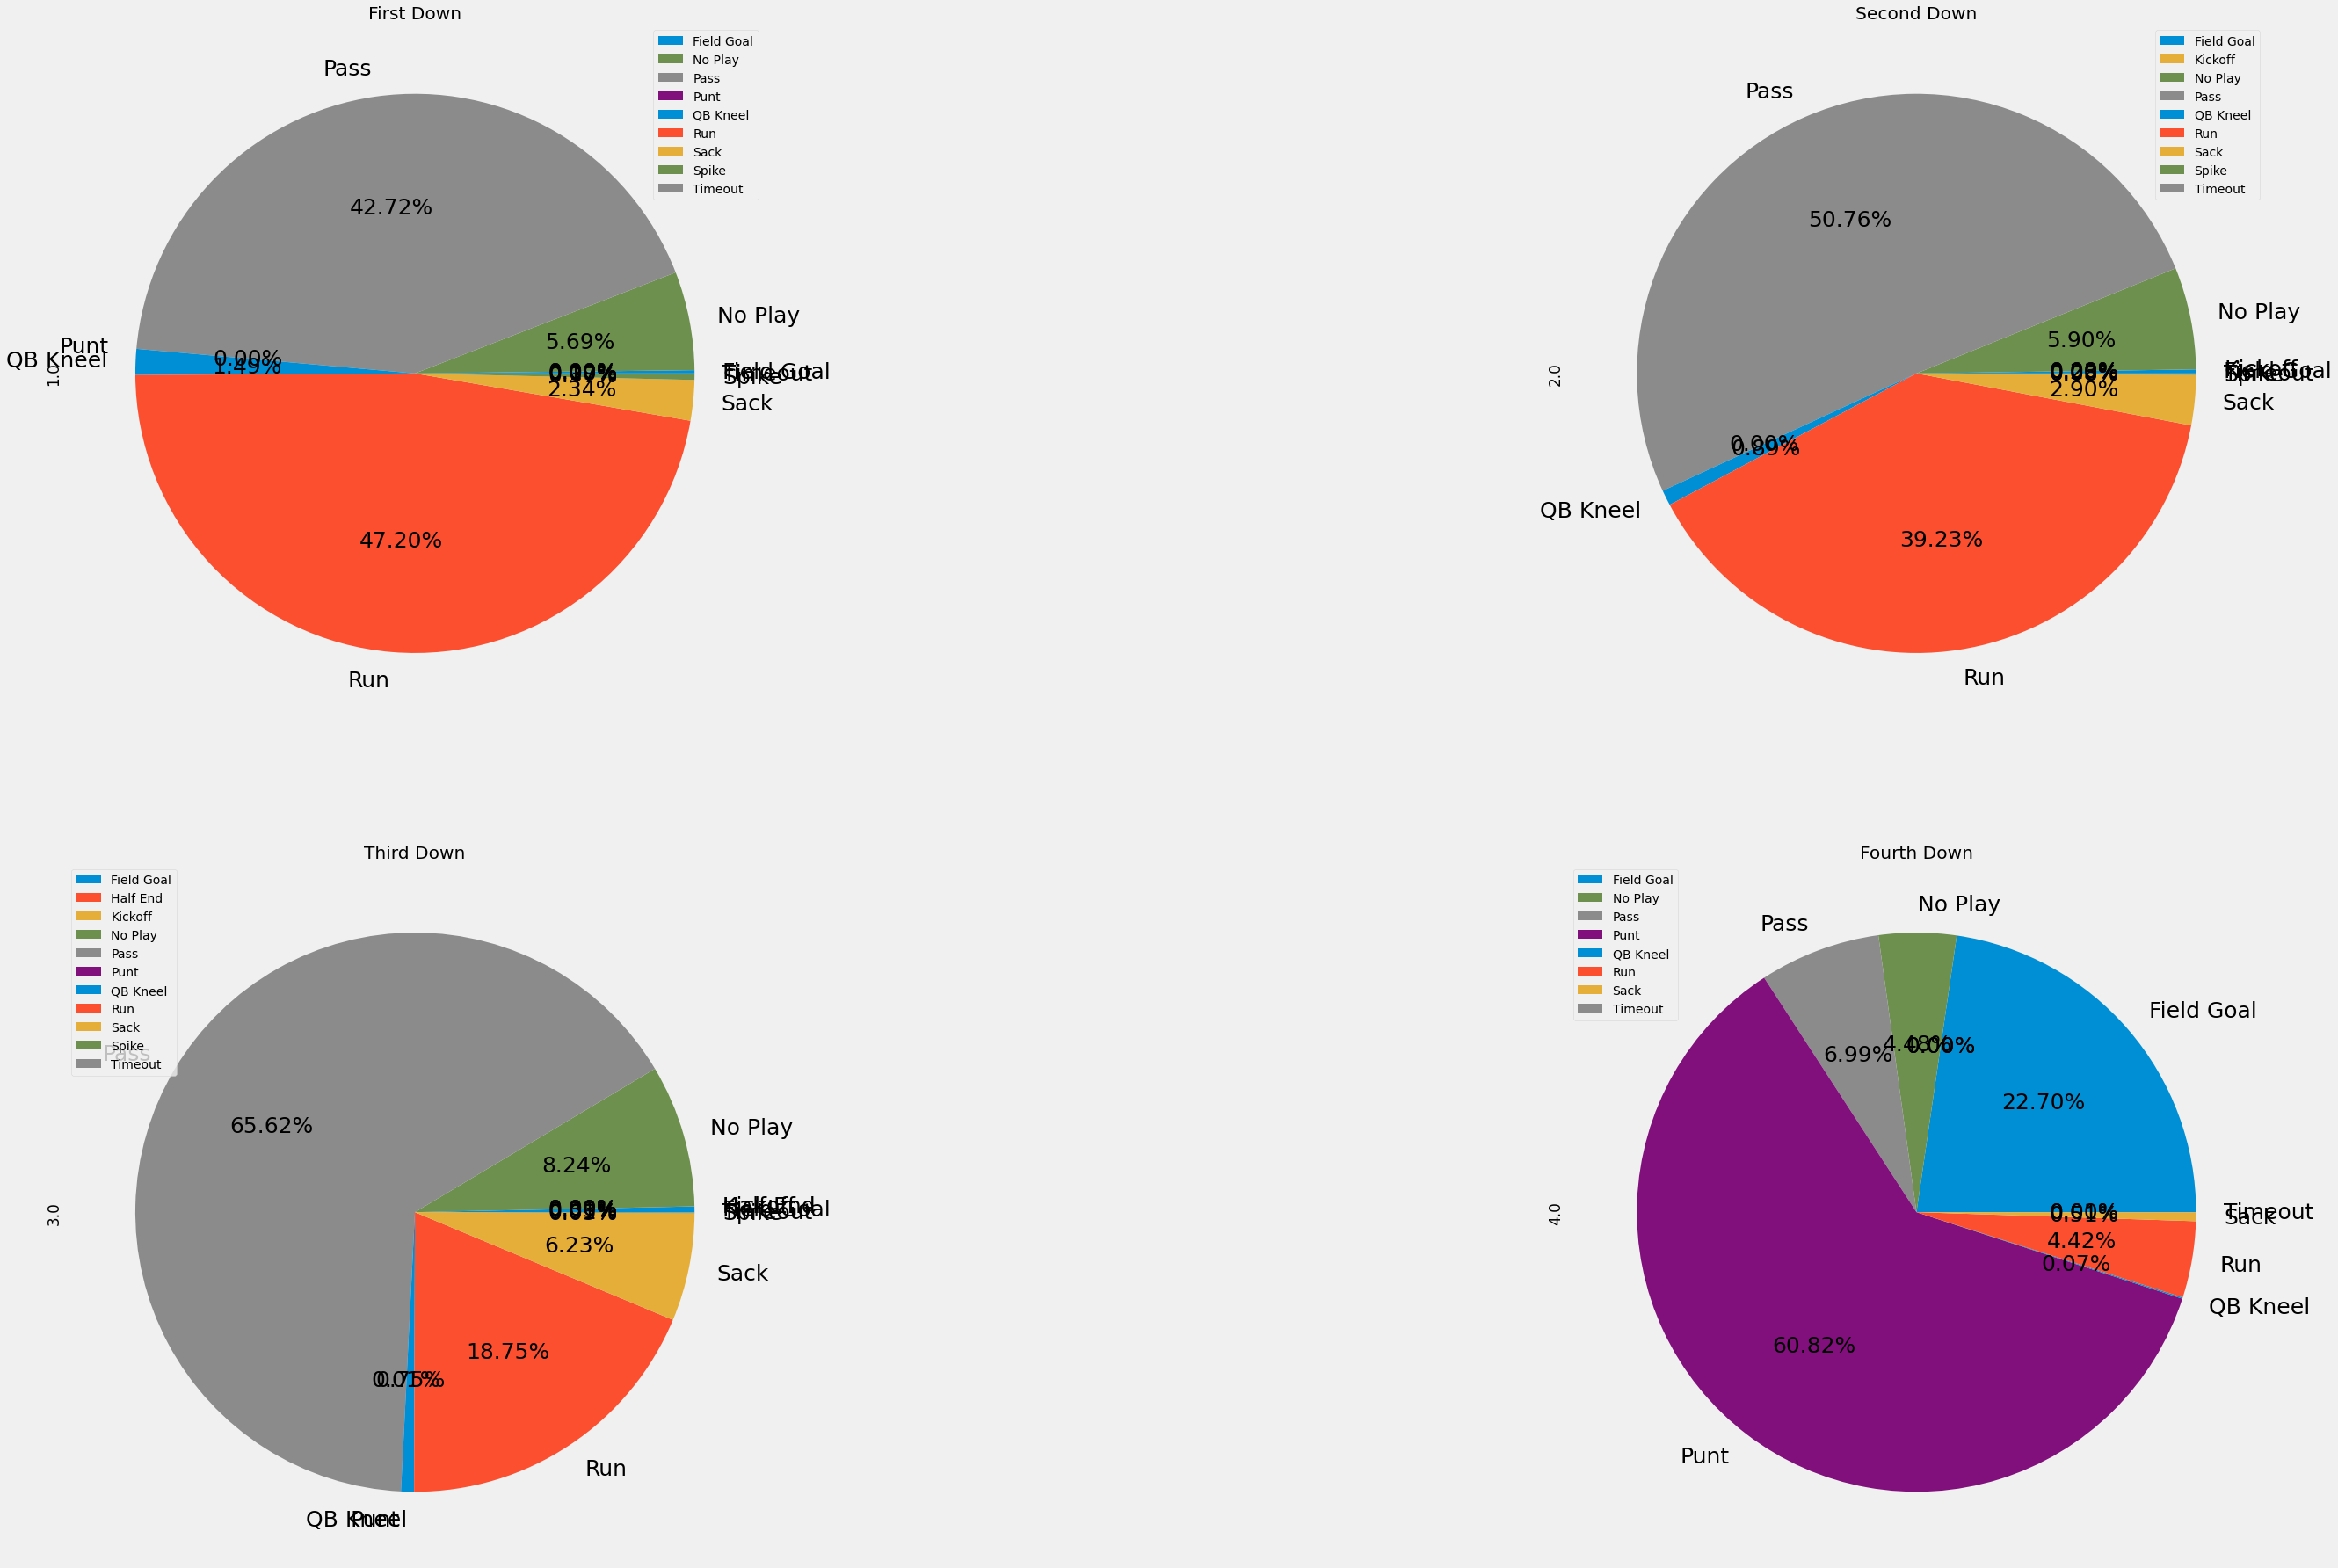

In [243]:
nfl_data = nfl.copy()
nfl_data['index'] = nfl.index
nfl_data.pivot_table(index="PlayType", columns='down', values='index', aggfunc='count', fill_value=0).plot.pie(subplots=True, figsize=(50,30), 
                                                                                                                
title = ['First Down', 'Second Down', 

'Third Down',  'Fourth Down'], 
                                                                                                                
layout = (2,2), autopct="%.2f%%",                                                                                                              
                                                                                                                
fontsize=25)                                                                                                               

In [233]:
def sum_up_plays(GameID):
    sub_df = nfl_data[nfl_data['GameID'] == GameID]
    for drive in sub_df['Drive'].unique():
        if math.isnan(sub_df[sub_df['Drive'] == drive]['ScoreDiff'].values[0]):
            if len(sub_df[sub_df['Drive'] == drive]['ScoreDiff'].values) == 1:
                continue
            else:
                score = sub_df[sub_df['Drive'] == drive]['ScoreDiff'].values[1]
        else:
            score = sub_df[sub_df['Drive'] == drive]['ScoreDiff'].values[0]
        pass_plays = 0
        for play in sub_df[sub_df['Drive'] == drive]['PlayType'].values:
            if play == 'Pass':
                pass_plays += 1
        if score in scores_and_plays.keys():
            scores_and_plays[score].append(pass_plays)
        else:
            scores_and_plays[score] = [pass_plays]


In [234]:
scores_and_plays = {}
for game in nfl_data['GameID'].unique():
    sum_up_plays(game)

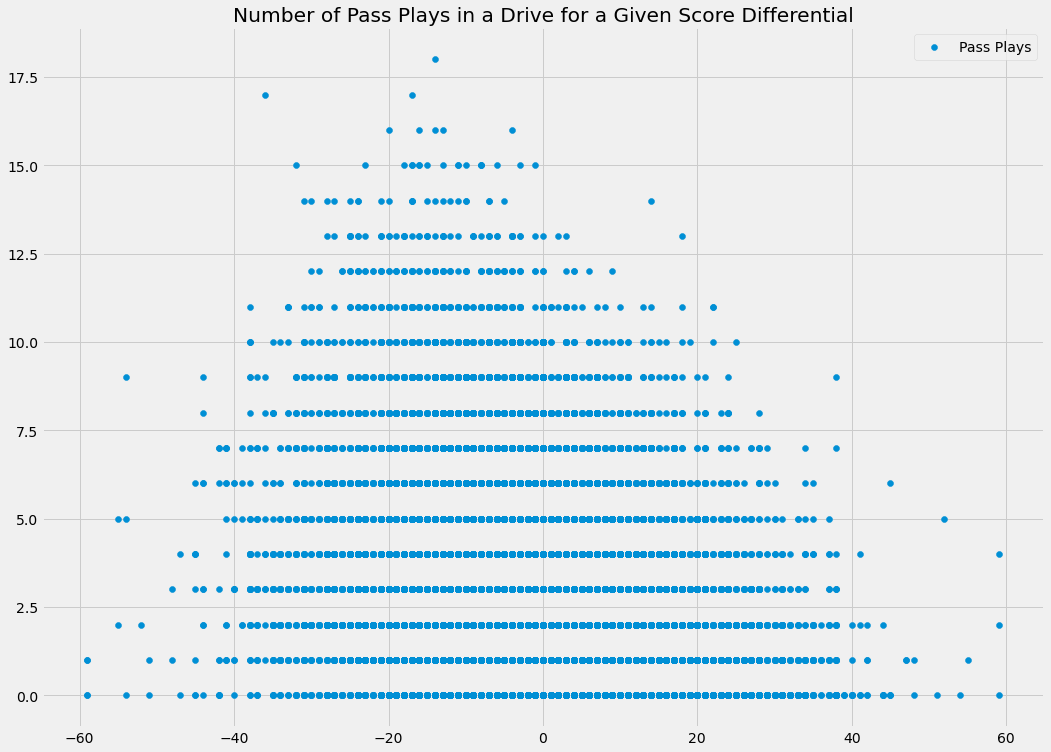

In [145]:
x = []
y = []
for pair in scores_and_plays.items():
    for plays in pair[1]:
        y.append(plays)
        x.append(pair[0])
plt.figure(figsize=(16, 12))
plt.scatter(x, y)
plt.title("Number of Pass Plays in a Drive for a Given Score Differential")
plt.legend(['Pass Plays'])
plt.show()

In [162]:
posteam = 'GB'
if posteam == 'GB':
    nfl_data = posteam
else:
    nfl_data = df.loc[df['posteam'] == posteam]


In [163]:
posteam

'GB'

In [240]:
#play call on third down with yards to go 

y2g = range(1,25)

# filter down the total team_df to just third downs
nfl_data_d3 = nfl.loc[nfl['down'] == 3]

# create list of Counters of PlayType for each yard in my rage of interest
plays_on_d3 = [Counter(nfl_data_d3.loc[nfl_data_d3['ydstogo'] == yrd]['PlayType']) for yrd in y2g]

# x-axis is y2g, defined above
x = y2g

# extract the run count for each yard
y_runs = [play['Run'] for play in plays_on_d3]

# extract the pass count for each yard
y_pass = [play['Pass'] for play in plays_on_d3]

# get the figure ready and put my lines on it
p = figure(title='Third Down Play Type by Yard to Go', toolbar_location=None, tools='',
           plot_height=350, plot_width=750)
p.line(x, y_pass, color='#2b83ba', legend='Pass', line_width=4)
p.line(x, y_runs, color='#abdda4', legend='Run', line_width=4)
p.legend.location = 'top_left'
output_notebook()
show(p)

Loading BokehJS ...

In [308]:
pd.pivot_table(nfl, index = 'PlayType', values ='Touchdown', columns ='Season')

Season,2009,2010,2011,2012,2013,2014,2015,2016,2017
PlayType,,,,,,,,,
End of Game,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Extra Point,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Field Goal,0.002153,0.001038,0.000000,0.002947,0.001001,0.002026,0.001012,0.000992,0.000000
Half End,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
Kickoff,0.007223,0.009792,0.003484,0.005323,0.003719,0.002669,0.003037,0.003407,0.003129
No Play,0.000000,0.000000,0.000848,0.000422,0.000000,0.000000,0.000767,0.000784,0.000414
Pass,0.045829,0.048048,0.047690,0.048115,0.049815,0.049347,0.050210,0.045616,0.047178
Punt,0.006525,0.006897,0.010471,0.011750,0.007937,0.010465,0.006959,0.005135,0.006132
QB Kneel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [295]:
#FIll Possesion Team Missing Values

def fill_posteam(row):
    if not isinstance(row['posteam'], str) and math.isnan(row['posteam']):
        prev_idx = row.name - 1
        if row['Drive'] == nfl['Drive'][prev_idx]:
            while not isinstance(nfl['posteam'][prev_idx], str):
                prev_idx -= 1
            return nfl['posteam'][prev_idx]
        else:
            next_idx = row.name + 1
            while not isinstance(nfl['posteam'][next_idx], str):
                next_idx += 1
            return nfl['posteam'][next_idx]
    else:
        return row['posteam']

nfl['posteam'] = nfl.apply(lambda x: fill_posteam(x), axis=1)

In [296]:
#fill yards gained
def fill_yards_gained(row):
    if math.isnan(row['Yards.Gained']):
        if row['PlayType'] == 'pass' or row['PlayType'] == 'run' or row['PlayType'] == 'qb_kneel':
            prev_idx = row.name - 1
            return row['yardline_100'] - nfl['yardline_100'][prev_idx]
    else:
        return row['Yards.Gained']
    
nfl['Yards.Gained'] = nfl.apply(lambda x: fill_yards_gained(x), axis=1)

In [297]:
nfl

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,9/10/09,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,9/10/09,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,9/10/09,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,9/10/09,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,9/10/09,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,12/31/17,2017123101,29,4,NaN,0:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,12/31/17,2017123101,29,4,3.0,0:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,12/31/17,2017123101,29,4,4.0,0:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,12/31/17,2017123101,30,4,1.0,0:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [298]:
nfl['AirYards'].max()

84

In [301]:
nfl['AirYards'].min()

-70

In [302]:
sum(nfl['PassAttempt'])

168222

In [305]:
nfl['AirYards'].mean()

3.264005808363258

In [318]:
filter1 = nfl["posteam"]=="GB"
filter2 = nfl["Season"]==2010

In [319]:
nfl.where(filter1 & filter2, inplace = True)

In [320]:
nfl

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
above_50 = nfl[nfl["Touchdown_Prob"] > .50]

In [325]:
above_50.head(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
46370,9/12/10,2.010091e+09,5.0,1.0,1.0,2:34,3.0,2854.0,37.0,PHI,...,0.417032,0.494225,0.505775,0.494857,0.505143,0.505775,-0.000632,-0.009792,0.009161,2010.0
46374,9/12/10,2.010091e+09,5.0,1.0,1.0,0:35,1.0,2735.0,0.0,PHI,...,NaN,0.503460,0.496540,0.528133,0.471867,0.496540,-0.024674,NaN,NaN,2010.0
46437,9/12/10,2.010091e+09,13.0,3.0,1.0,10:48,11.0,1548.0,41.0,PHI,...,NaN,0.107172,0.892828,0.112183,0.887817,0.892828,-0.005010,NaN,NaN,2010.0
46439,9/12/10,2.010091e+09,13.0,3.0,1.0,9:19,10.0,1459.0,49.0,PHI,...,NaN,0.100674,0.899326,0.081485,0.918515,0.899326,0.019188,NaN,NaN,2010.0
46440,9/12/10,2.010091e+09,13.0,3.0,1.0,8:40,9.0,1420.0,39.0,PHI,...,NaN,0.081485,0.918515,0.069906,0.930094,0.918515,0.011579,NaN,NaN,2010.0
46458,9/12/10,2.010091e+09,15.0,3.0,1.0,2:45,3.0,1065.0,48.0,PHI,...,NaN,0.101883,0.898117,0.108604,0.891396,0.898117,-0.006721,NaN,NaN,2010.0
47390,9/19/10,2.010092e+09,1.0,1.0,1.0,12:45,13.0,3465.0,25.0,BUF,...,NaN,0.605260,0.394740,0.596420,0.403580,0.605260,-0.008840,NaN,NaN,2010.0
47392,9/19/10,2.010092e+09,1.0,1.0,2.0,12:02,13.0,3422.0,6.0,BUF,...,-0.000233,0.614377,0.385623,0.576418,0.423582,0.614377,-0.037959,-0.022367,-0.015591,2010.0
47403,9/19/10,2.010092e+09,3.0,1.0,1.0,8:28,9.0,3208.0,37.0,BUF,...,NaN,0.749243,0.250757,0.744858,0.255142,0.749243,-0.004385,NaN,NaN,2010.0
47404,9/19/10,2.010092e+09,3.0,1.0,2.0,7:48,8.0,3168.0,40.0,BUF,...,-1.281472,0.744858,0.255142,0.721278,0.278722,0.744858,-0.023580,0.016350,-0.039930,2010.0


In [327]:
nfl.groupby('down').mean()['Yards.Gained']

down
1.0    5.572034
2.0    5.327778
3.0    5.626126
4.0    3.796460
Name: Yards.Gained, dtype: float64

In [337]:
def get_touchdown(Touchdown, posteam):
    return posteam

In [338]:
nfl['TotalTouchdown'] = nfl['Touchdown'].apply(get_touchdown, posteam='GB')

In [339]:
nfl['TotalTouchdown']

0         GB
1         GB
2         GB
3         GB
4         GB
          ..
407683    GB
407684    GB
407685    GB
407686    GB
407687    GB
Name: TotalTouchdown, Length: 407688, dtype: object

In [ ]:
def nfl_data( )